In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### pkl_df1 is from predictor one
#### pkl_df2 is from predictor two

In [44]:
pkl_df1 = '../pickled_data/fire_df_pred_one.pkl'
pkl_df2 = '../pickled_data/fire_df_pred_two.pkl'

fire_df1 = pd.read_pickle(pkl_df1)
fire_df2 = pd.read_pickle(pkl_df2)

In [45]:
fire_df1.head()

,origin,busi_impact,num_casualties,num_rescued,est_loss,est_displaced,ext_agent_app_or_defer_time,extent,fire_alarm_impact_on_evac,fire_alarm_sys_op,...,material_first_ignited,method_of_fire_control,possible_cause,property_use,smoke_alarm_at_fire_origin_alarm_failure,smoke_alarm_at_fire_origin_alarm_type,status_of_fire_on_arrival,alarm_time,arrival_time,response_time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,273.0
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,311.0
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,222.0
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,177.0
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,304.0


In [46]:
fire_df1.origin.unique()

array(['Porch or Balcony', 'Cooking Area or Kitchen',
       'Living Area (e.g. living, TV, recreation, etc)',
       'Undetermined  (formerly 98)',
       'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)',
       'Engine Area', 'Concealed Ceiling Area', 'Hallway, Corridor',
       'Laundry Area', 'Roof', 'Electrical Systems',
       'Storage Area (outside)', 'Basement/cellar (not partitioned)',
       'Court, Patio, Terrace', 'Lobby, Entranceway',
       'Trash, Rubbish Storage (inc garbage chute room, garbage/industri',
       'Other Outside Area',
       'Closet (eg. clothes, broom, linen closet, etc.)', 'Garage',
       'Trash, rubbish area (outside)',
       'Dining or Beverage Area (inc mess, canteen, lunchroom, cafeteria',
       'Washroom or Bathroom (toilet,restroom/locker room)',
       'Attached Deck', 'Other - unclassified',
       'Mechanical/Electrical Services Room', 'Other Storage Area',
       'Stairway, Escalator', 'Attic Area', 'Other Structural Area',


In [47]:
fire_df1.busi_impact.unique()

array(['No business interruption', 'Undetermined',
       'Not applicable (not a business)', 'May not resume operations',
       'May resume operations within a month',
       'May resume operations within a week',
       'May resume operations within a year'], dtype=object)

### Let's try removing the huge outliers from the target variables
#### There are some huge values while most are quite low

In [48]:
# Identify outliers using IQR method
q1 = fire_df2['est_loss'].quantile(0)
q3 = fire_df2['est_loss'].quantile(0.75)
iqr = q3 - q1

# Find upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df_no_outliers = fire_df2[(fire_df2['est_loss'] >= lower_bound) & (fire_df2['est_loss'] <= upper_bound)]

print("Original data size:", fire_df2.shape)
print("Data size after removing outliers:", df_no_outliers.shape)

Original data size: (11214, 64)
Data size after removing outliers: (9348, 64)


In [49]:
fire_df2

,b_impact_labels_b_impact_1,b_impact_labels_b_impact_2,b_impact_labels_b_impact_3,b_impact_labels_b_impact_4,b_impact_labels_b_impact_5,b_impact_labels_b_impact_6,extent_labels_extent_1,extent_labels_extent_10,extent_labels_extent_11,extent_labels_extent_2,...,status_labels_status_7,num_casualties,num_rescued,est_displaced,incident_station_area,incident_ward,latitude,longitude,response_time,est_loss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,1.000000,-1.000000,-0.982036,-0.209302,0.332675,-0.127842,-0.972096,3000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.000000,-0.348837,-0.943944,-0.814371,-0.720930,0.287465,-0.589602,-0.967838,50000.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.866667,-0.627907,-0.739740,0.281437,0.209302,-0.468474,0.024923,-0.977811,1000000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,-0.720930,-0.971972,0.323353,-0.116279,-0.530276,-0.054320,-0.982854,1000000.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.066667,-0.744186,-0.995996,0.982036,-0.813953,-0.152388,-0.515681,-0.968622,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,-1.000000,-1.000000,0.209581,-0.441860,-0.390772,0.023678,-0.979156,0.0
11210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,-1.000000,-1.000000,-0.335329,-0.116279,0.091742,0.387997,-0.960778,1000.0
11211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.000000,-1.000000,-1.000000,-0.335329,-0.116279,0.091742,0.387997,-0.971984,0.0
11212,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.200000,-1.000000,-0.997998,-0.820359,-0.720930,0.356021,-0.473882,-0.971872,100000.0


In [50]:
corr_matrix = df_no_outliers.corr()
feature_corr = corr_matrix['est_loss'].sort_values(ascending=False)

In [51]:
feature_corr

est_loss                      1.000000
extent_labels_extent_5        0.218898
extent_labels_extent_1        0.213382
extent_labels_extent_2        0.201481
b_impact_labels_b_impact_4    0.106300
                                ...   
type_labels_type_1           -0.071567
impact_labels_impact_5       -0.074199
failure_labels_failure_5     -0.095622
ctrl_labels_ctrl_1           -0.233684
status_labels_status_1       -0.254067
Name: est_loss, Length: 64, dtype: float64

In [52]:
# Use Random Forest Clf to look at feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df_no_outliers.drop(columns=['est_loss'])
y = df_no_outliers['est_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                        feature  importance
57               est_displaced    0.185273
60                    latitude    0.099848
62               response_time    0.099732
61                   longitude    0.089844
58       incident_station_area    0.056498
..                         ...         ...
22      impact_labels_impact_6    0.000609
2   b_impact_labels_b_impact_3    0.000594
47          type_labels_type_5    0.000576
54      status_labels_status_7    0.000386
5   b_impact_labels_b_impact_6    0.000163

[63 rows x 2 columns]


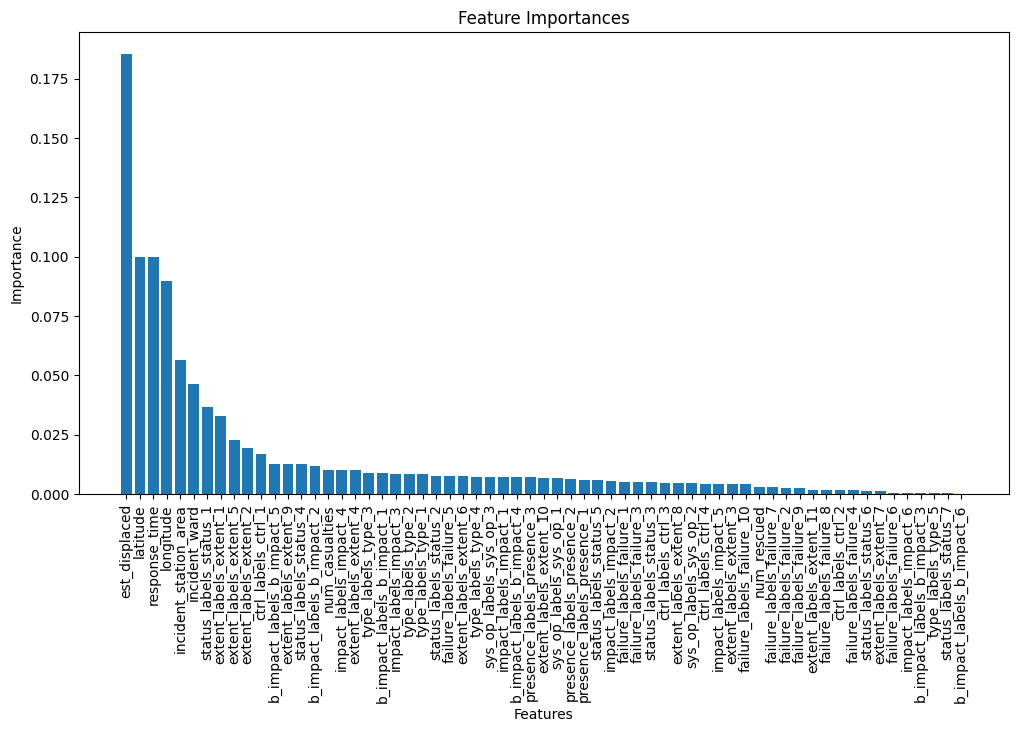

Number of features to keep: 42
Features to keep:
 ['est_displaced', 'latitude', 'response_time', 'longitude', 'incident_station_area', 'incident_ward', 'status_labels_status_1', 'extent_labels_extent_1', 'extent_labels_extent_5', 'extent_labels_extent_2', 'ctrl_labels_ctrl_1', 'b_impact_labels_b_impact_5', 'extent_labels_extent_9', 'status_labels_status_4', 'b_impact_labels_b_impact_2', 'num_casualties', 'impact_labels_impact_4', 'extent_labels_extent_4', 'type_labels_type_3', 'b_impact_labels_b_impact_1', 'impact_labels_impact_3', 'type_labels_type_2', 'type_labels_type_1', 'status_labels_status_2', 'failure_labels_failure_5', 'extent_labels_extent_6', 'type_labels_type_4', 'sys_op_labels_sys_op_3', 'impact_labels_impact_1', 'b_impact_labels_b_impact_4', 'presence_labels_presence_3', 'extent_labels_extent_10', 'sys_op_labels_sys_op_1', 'presence_labels_presence_2', 'presence_labels_presence_1', 'status_labels_status_5', 'impact_labels_impact_2', 'failure_labels_failure_1', 'failure_la

In [53]:
# Find a cumulative importance threshold

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Calculate cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['importance'])

# Determine the number of features to keep to reach 95% cumulative importance
cutoff_index = np.where(cumulative_importance >= 0.95)[0][0]

# Features to keep
features_to_keep = feature_importance_df.iloc[:cutoff_index + 1]['feature'].tolist()

print(f"Number of features to keep: {cutoff_index + 1}")
print(f"Features to keep:\n {features_to_keep}")

In [54]:
important_df = df_no_outliers[['est_loss', 'est_displaced', 'longitude', 'incident_ward', 'failure_labels_failure_1', 
                         'incident_station_area', 'latitude', 'b_impact_labels_b_impact_1', 
                         'b_impact_labels_b_impact_3']]

In [55]:
important_df.head()

,est_loss,est_displaced,longitude,incident_ward,failure_labels_failure_1,incident_station_area,latitude,b_impact_labels_b_impact_1,b_impact_labels_b_impact_3
0,3000.0,-1.000000,-0.127842,-0.209302,0.0,-0.982036,0.332675,0.0,0.0
6,30000.0,-0.973974,-0.194093,-0.395349,0.0,0.886228,-0.648282,0.0,0.0
10,10000.0,-0.991992,-0.222760,-0.627907,0.0,0.886228,-0.503897,0.0,0.0
17,0.0,-0.699700,-0.078477,-0.023256,0.0,0.197605,-0.238058,0.0,0.0
22,15600.0,-0.993994,-0.696959,-1.000000,0.0,0.808383,0.132675,0.0,0.0


In [56]:
X = important_df.drop(columns='est_loss')
y = important_df['est_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [57]:
# Trying SVR before using origin embeddings

from sklearn.svm import SVR

svr = SVR(kernel='linear')

In [58]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [59]:
# Goal is to be lower than 191481.60688201035 (pred_two file)
from sklearn.metrics import mean_squared_error

svr_loss_pred = svr.predict(X_test)

svr_linear_mse = mean_squared_error(y_test, svr_loss_pred)
svr_linear_rmse = np.sqrt(svr_linear_mse)
svr_linear_rmse

8497.295911006095

In [60]:
from sklearn.model_selection import cross_val_score

svr = SVR(kernel='linear', C=1)
scores = cross_val_score(svr, X, y, cv=5)
scores

array([-0.32195768, -0.1610661 , -0.18760755, -0.32549596, -0.30675397])

In [61]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.26 accuracy with a standard deviation of 0.07


In [62]:
# Grid search cv

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Print all the results
results = pd.DataFrame(grid_search.cv_results_)
print(results)

# Optionally, you can save the best model
best_model = grid_search.best_estimator_

Best parameters found:  {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score:  -68660356.6855196
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        2.060198      0.204959         0.259399        0.026243      0.1   
1        2.155599      0.216971         0.292801        0.028018      0.1   
2        2.768197      0.240399         1.295400        0.086102      0.1   
3        2.750198      0.147362         0.447400        0.024631      0.1   
4        1.819599      0.122059         0.277600        0.020500      0.1   
..            ...           ...              ...             ...      ...   
91       2.884196      0.169526         0.440002        0.033128    100.0   
92       1.909999      0.074585         0.264000        0.011592    100.0   
93       2.214598      0.050527         0.366200        0.031644    100.0   
94       2.870200      0.151235         1.208600        0.065259    100.0   
95       3.183797      0.170740         

### Lets look at the correlation between origin and est_loss

In [63]:
origin_df = fire_df1[['origin', 'est_loss']]

In [64]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    11214 non-null  object
 1   est_loss  11214 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 175.3+ KB


In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')

In [67]:
ohe_transform = ohe.fit_transform(origin_df[['origin']])

In [68]:
ohe_transform

,"origin_Assembly Area (inc school room,spectator area, church, etc)",origin_Attached Deck,origin_Attic Area,origin_Awning or Canopy,origin_Basement/cellar (not partitioned),origin_Chimney/Flue Pipe,"origin_Closet (eg. clothes, broom, linen closet, etc.)",origin_Concealed Ceiling Area,origin_Concealed Floor Area,origin_Concealed Wall Area,...,"origin_Stairway, Escalator",origin_Storage Area (outside),"origin_Supply Storage Room (inc maintenance/office/document storage, et","origin_Trash, Rubbish Storage (inc garbage chute room, garbage/industri","origin_Trash, rubbish area (outside)",origin_Trunk/Cargo Area,origin_Under Investigation,origin_Undetermined (formerly 98),"origin_Utility Shaft (eg. electrical wiring/phone, etc.)","origin_Washroom or Bathroom (toilet,restroom/locker room)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
origin_ohe = pd.concat([origin_df, ohe_transform], axis=1).drop(columns = ['origin'])

In [70]:
origin_ohe

,est_loss,"origin_Assembly Area (inc school room,spectator area, church, etc)",origin_Attached Deck,origin_Attic Area,origin_Awning or Canopy,origin_Basement/cellar (not partitioned),origin_Chimney/Flue Pipe,"origin_Closet (eg. clothes, broom, linen closet, etc.)",origin_Concealed Ceiling Area,origin_Concealed Floor Area,...,"origin_Stairway, Escalator",origin_Storage Area (outside),"origin_Supply Storage Room (inc maintenance/office/document storage, et","origin_Trash, Rubbish Storage (inc garbage chute room, garbage/industri","origin_Trash, rubbish area (outside)",origin_Trunk/Cargo Area,origin_Under Investigation,origin_Undetermined (formerly 98),"origin_Utility Shaft (eg. electrical wiring/phone, etc.)","origin_Washroom or Bathroom (toilet,restroom/locker room)"
0,3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11210,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11211,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11212,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
origin_corr_matrix = origin_ohe.corr()
origin_corr = origin_corr_matrix['est_loss'].sort_values(ascending=False)
origin_corr

est_loss                                                                   1.000000
origin_Under Investigation                                                 0.398823
origin_Undetermined  (formerly 98)                                         0.071525
origin_Electrical Systems                                                  0.029749
origin_Basement/cellar (not partitioned)                                   0.022698
                                                                             ...   
origin_Trash, rubbish area (outside)                                      -0.009370
origin_Laundry Area                                                       -0.009838
origin_Porch or Balcony                                                   -0.014096
origin_Trash, Rubbish Storage (inc garbage chute room, garbage/industri   -0.019335
origin_Cooking Area or Kitchen                                            -0.025510
Name: est_loss, Length: 74, dtype: float64

In [72]:
origin_df.value_counts()

origin                                                            est_loss
Trash, Rubbish Storage (inc garbage chute room, garbage/industri  0           423
Cooking Area or Kitchen                                           5000        317
                                                                  1000        278
                                                                  10000       233
                                                                  0           209
                                                                             ... 
Living Area (e.g. living, TV, recreation, etc)                    21000         1
                                                                  10500         1
                                                                  7500          1
                                                                  6500          1
Washroom or Bathroom (toilet,restroom/locker room)                500000        1
Name: count, Length: 19

In [80]:
counts = origin_df[origin_df['origin'] == 'Under Investigation']
len(counts)

5

In [73]:
origin_X = origin_ohe.drop(columns=['est_loss'])
origin_y = origin_ohe['est_loss']

origin_X_train, origin_X_test, origin_y_train, origin_y_test = train_test_split(origin_X, origin_y, test_size=0.2, random_state=42)

In [74]:
# Trying SVR before using origin embeddings

from sklearn.svm import SVR

svr2 = SVR(kernel='linear')

In [75]:
svr2.fit(origin_X_train, origin_y_train)

SVR(kernel='linear')

In [76]:
# Goal is to be lower than 191481.60688201035 (pred_two file)
from sklearn.metrics import mean_squared_error

svr2_loss_pred = svr2.predict(origin_X_test)

svr2_linear_mse = mean_squared_error(origin_y_test, svr2_loss_pred)
svr2_linear_rmse = np.sqrt(svr2_linear_mse)
svr2_linear_rmse

191492.5611235095